<h1 style="
    font-family: 'Arial', sans-serif;
    font-size: 2.5em;
    background: linear-gradient(90deg, #FF7F50, #1E90FF);
    -webkit-background-clip: text;
    -webkit-text-fill-color: transparent;
    text-align: center;
    text-shadow: 2px 2px 5px rgba(0, 0, 0, 0.3);
    margin-bottom: 20px;
    padding: 10px;
">
  Import Libraries
</h1>


In [1]:
# Data Manipulation and Numerical Operations
import pandas as pd        # Data manipulation and analysis
import numpy as np         # Numerical computations and array handling

# Visualization Libraries
import matplotlib.pyplot as plt  # Data visualization (plots, graphs, etc.)
import seaborn as sns            # Advanced statistical data visualization

# Machine Learning Preprocessing
from sklearn.feature_selection import SelectKBest, f_regression  # Feature selection based on F-test (regression tasks)
from sklearn.model_selection import train_test_split  # Split dataset into training and testing sets
from sklearn.preprocessing import StandardScaler      # Standard scaling of features (mean=0, std=1)
from sklearn.preprocessing import MinMaxScaler        # Scaling features to a fixed range
from sklearn.preprocessing import LabelEncoder        # Encode categorical variables into numerical values
from sklearn.feature_selection import chi2            # Chi-squared statistical test for feature selection (categorical data)
from sklearn import metrics                           # Evaluation metrics for model performance

# Feature Selection Algorithms
from skfeature.function.similarity_based import fisher_score  # Fisher score for feature selection

# Multicollinearity and Statistical Analysis
from statsmodels.stats.outliers_influence import variance_inflation_factor  # Calculate Variance Inflation Factor (VIF) to detect multicollinearity

# Deep Learning Libraries (TensorFlow and Keras)
import tensorflow as tf                     # Deep learning framework
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization  # Keras layers (fully connected, dropout, batch normalization)
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau  # Callbacks for deep learning models (early stopping, checkpointing, learning rate reduction)
from keras import layers                    # Core Keras layers
import keras                                # Keras framework for building and training deep learning models
from keras.optimizers import Adam           # Adam optimizer for model training
from keras.models import load_model         # Load pre-trained Keras models

# Utilities
import joblib  # Save and load models, scalers, or preprocessing objects


<h1 style="
    font-family: 'Arial', sans-serif;
    font-size: 2.5em;
    background: linear-gradient(90deg, #FF7F50, #1E90FF);
    -webkit-background-clip: text;
    -webkit-text-fill-color: transparent;
    text-align: center;
    text-shadow: 2px 2px 5px rgba(0, 0, 0, 0.3);
    margin-bottom: 20px;
    padding: 10px;
">
    Loading and Exploring the dataset
</h1>


In [2]:
# Load the data  and reading the csv file
df = pd.read_csv("adm_data.csv")

In [3]:
df.head(5)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


<div style="background-color:#e0f4f7; padding:30px; border-radius:15px; font-family:'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; color:#004d40; border: 2px solid #00796b; max-width: 800px; margin:auto;">
    <h2 style="text-align:center; color:#00796b; font-size:28px; font-weight:bold; margin-bottom:20px;">Important Graduate Application Terms</h2>
    <h3 style="color:#004d40; font-size:22px; margin-bottom:5px;">GRE (Graduate Record Examination)</h3>
    <p style="font-size:16px; margin-bottom:15px;">The GRE is a test for graduate school, scored 260-340, with sections on Verbal, Quantitative, and Writing.</p>
    <h3 style="color:#004d40; font-size:22px; margin-bottom:5px;">SOP (Statement of Purpose)</h3>
    <p style="font-size:16px; margin-bottom:15px;">An SOP is a personal essay required for graduate applications, describing your academic background, career goals, and fit with the program.</p>
    <h3 style="color:#004d40; font-size:22px; margin-bottom:5px;">LOR (Letter of Recommendation)</h3>
    <p style="font-size:16px; margin-bottom:15px;">A LOR is a letter from a professor or employer supporting your qualifications, skills, and character for a program or job.</p>
    <h3 style="color:#004d40; font-size:22px; margin-bottom:5px;">CGPA (Cumulative Grade Point Average)</h3>
    <p style="font-size:16px;">CGPA is the overall average of a student’s grades, typically measured on a scale of 0 to 4 or 0 to 10, reflecting academic performance.</p>
</div>


In [4]:
# check the dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [5]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [6]:
# Find duplicate rows
duplicates = df.duplicated().sum()

duplicates

0

In [7]:
# Removing the "Serial No", this is useless column and does not mean anything.
df = df.drop("Serial No.", axis=1)

<h1 style="
    font-family: 'Arial', sans-serif;
    font-size: 2.5em;
    background: linear-gradient(90deg, #FF7F50, #1E90FF);
    -webkit-background-clip: text;
    -webkit-text-fill-color: transparent;
    text-align: center;
    text-shadow: 2px 2px 5px rgba(0, 0, 0, 0.3);
    margin-bottom: 20px;
    padding: 10px;
">
    Visualization
</h1>


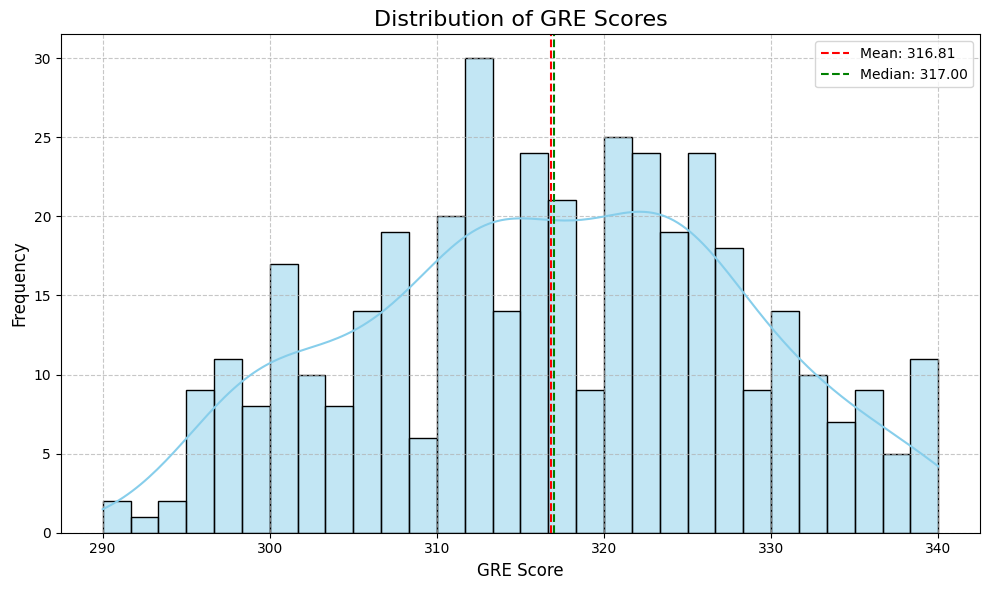

In [8]:
# Extract GRE scores from the DataFrame
gre_scores = df['GRE Score']

# Calculate mean and median statistics
mean_score = np.mean(gre_scores)
median_score = np.median(gre_scores)

# Set up the figure for visualization
plt.figure(figsize=(10, 6))

# Plotting the histogram with KDE for GRE Scores
sns.histplot(gre_scores, kde=True, bins=30, color='skyblue', edgecolor='black')

# Marking the mean and median on the plot
plt.axvline(mean_score, color='red', linestyle='--', linewidth=1.5, label=f'Mean: {mean_score:.2f}')
plt.axvline(median_score, color='green', linestyle='--', linewidth=1.5, label=f'Median: {median_score:.2f}')

# Adding titles, labels, and a grid
plt.title('Distribution of GRE Scores', fontsize=16)
plt.xlabel('GRE Score', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Display the legend for mean and median
plt.legend()

# Adjust layout for better visualization
plt.tight_layout()

# Display the final plot
plt.show()


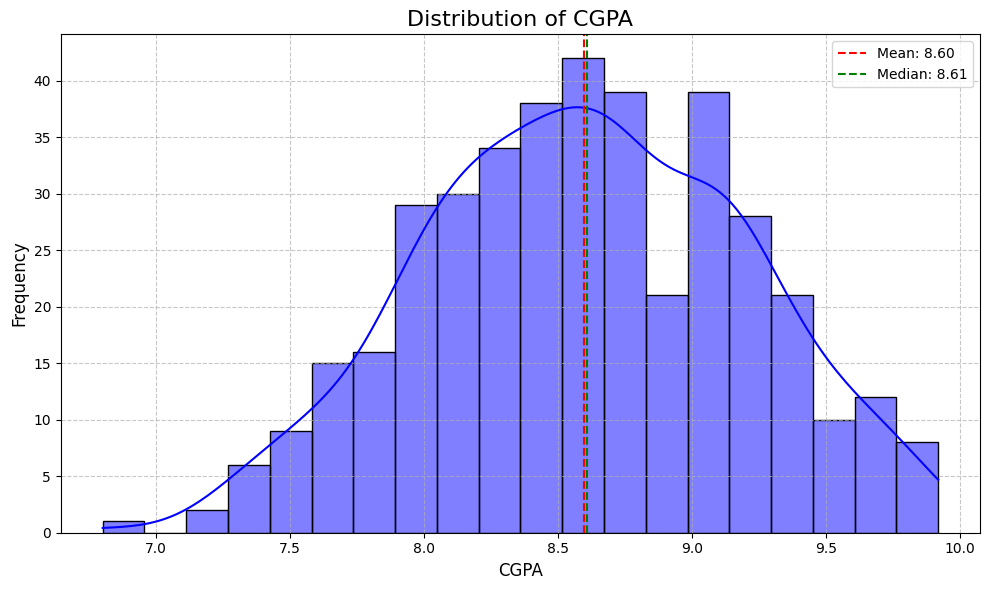

In [9]:
# Extract CGPA values from the DataFrame
cgpa = df['CGPA']

# Calculate mean and median statistics
mean_cgpa = np.mean(cgpa)
median_cgpa = np.median(cgpa)

# Set up the figure for CGPA visualization
plt.figure(figsize=(10, 6))

# Plotting the histogram with KDE for CGPA
sns.histplot(cgpa, kde=True, bins=20, color='blue', edgecolor='black')

# Marking the mean and median lines on the plot
plt.axvline(mean_cgpa, color='red', linestyle='--', linewidth=1.5, label=f'Mean: {mean_cgpa:.2f}')
plt.axvline(median_cgpa, color='green', linestyle='--', linewidth=1.5, label=f'Median: {median_cgpa:.2f}')

# Adding titles, labels, and a grid
plt.title('Distribution of CGPA', fontsize=16)
plt.xlabel('CGPA', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Display the legend for mean and median
plt.legend()

# Adjust layout for better visualization
plt.tight_layout()

# Display the final plot
plt.show()


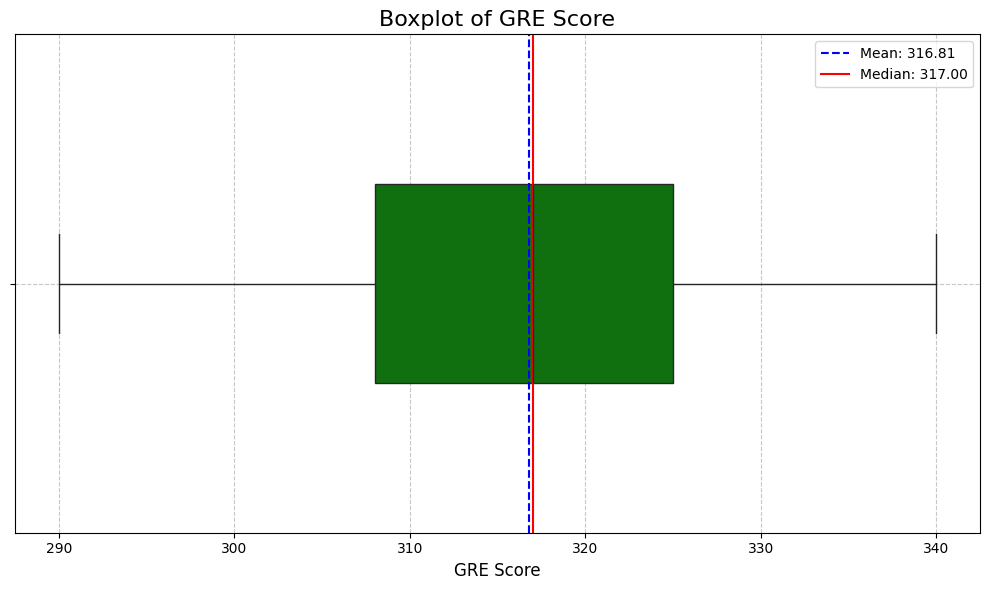

In [10]:
# 'GRE Score'
gre_scores = df['GRE Score']

# Calculating statistics
mean_score = np.mean(gre_scores)
median_score = np.median(gre_scores)

# Enhanced Boxplot of GRE Scores
plt.figure(figsize=(10, 6))
sns.boxplot(x=gre_scores, color='green', width=0.4)

# Adding title and labels
plt.title('Boxplot of GRE Score', fontsize=16)
plt.xlabel('GRE Score', fontsize=12)

# Highlighting mean
plt.axvline(mean_score, color='blue', linestyle='--', label=f'Mean: {mean_score:.2f}')
plt.axvline(median_score, color='red', linestyle='-', label=f'Median: {median_score:.2f}')

# Adding grid for readability
plt.grid(True, linestyle='--', alpha=0.7)

# Adding legend
plt.legend()

# Displaying the plot
plt.tight_layout()
plt.show()

C:\Users\murta\AppData\Local\Temp\ipykernel_2384\526129207.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Research', data=df, palette='Set2')


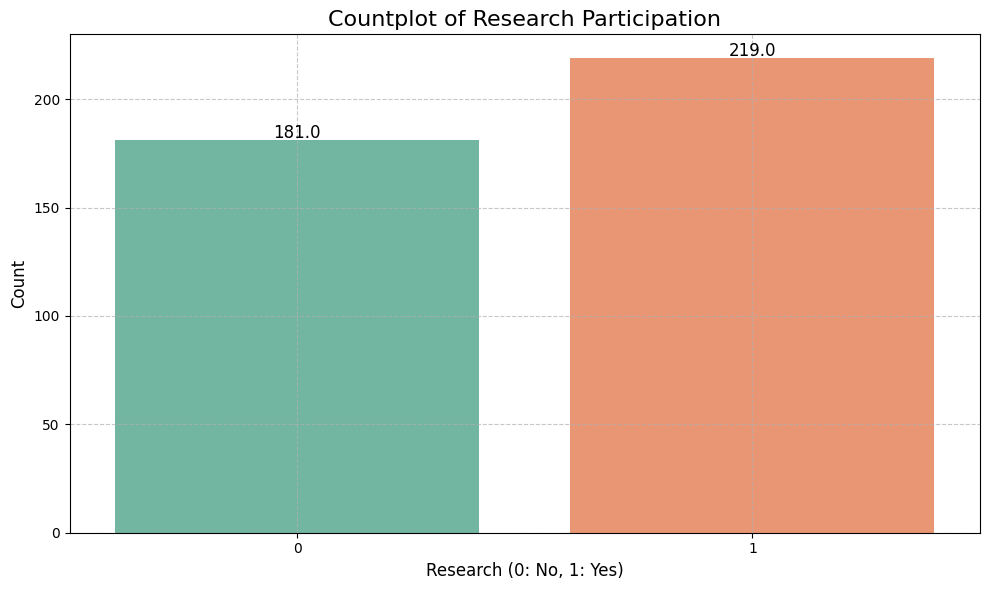

In [11]:
# Set up the figure for the 'Research' column visualization
plt.figure(figsize=(10, 6))

# Creating a countplot for Research Participation
ax = sns.countplot(x='Research', data=df, palette='Set2')

# Adding title and axis labels
plt.title('Countplot of Research Participation', fontsize=16)
plt.xlabel('Research (0: No, 1: Yes)', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Annotating the bars with counts
for bar in ax.patches:
    ax.annotate(f'{bar.get_height()}', 
                (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                ha='center', va='center', fontsize=12, color='black', 
                xytext=(0, 5), textcoords='offset points')

# Adding grid lines for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Adjust layout for better visualization
plt.tight_layout()

# Display the final plot
plt.show()

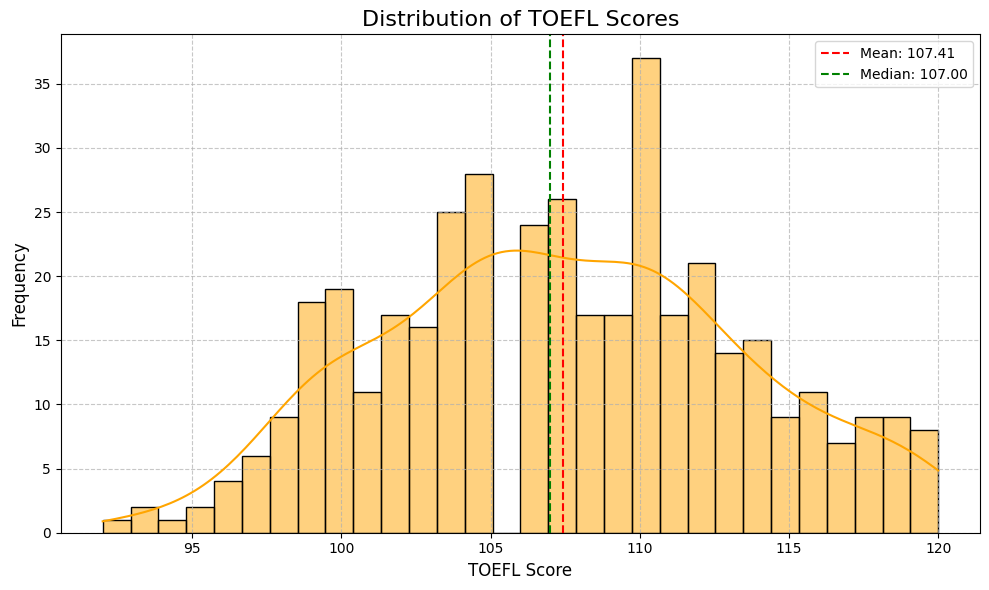

In [12]:
# Extract TOEFL scores from the DataFrame
toefl_scores = df['TOEFL Score']

# Calculate mean and median statistics for TOEFL scores
mean_toefl = np.mean(toefl_scores)
median_toefl = np.median(toefl_scores)

# Set up the figure for TOEFL Scores visualization
plt.figure(figsize=(10, 6))

# Plotting the histogram with KDE for TOEFL Scores
sns.histplot(toefl_scores, kde=True, bins=30, color='orange', edgecolor='black')

# Marking the mean and median lines on the plot
plt.axvline(mean_toefl, color='red', linestyle='--', linewidth=1.5, label=f'Mean: {mean_toefl:.2f}')
plt.axvline(median_toefl, color='green', linestyle='--', linewidth=1.5, label=f'Median: {median_toefl:.2f}')

# Adding title, labels, and grid lines for better readability
plt.title('Distribution of TOEFL Scores', fontsize=16)
plt.xlabel('TOEFL Score', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Display the legend for mean and median
plt.legend()

# Adjust layout for better visualization
plt.tight_layout()

# Display the final plot
plt.show()


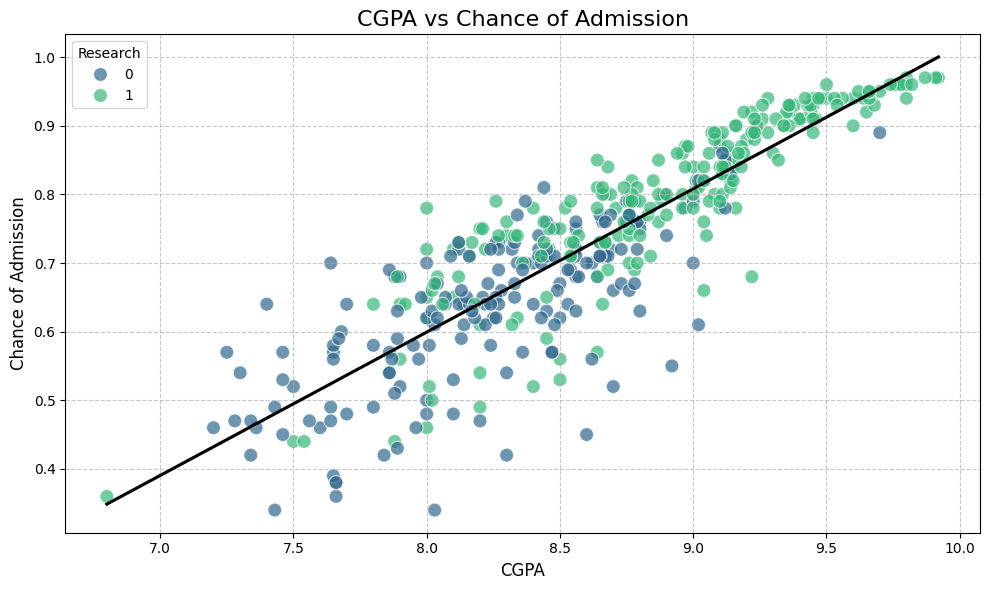

In [13]:
# Set up the figure for the scatter plot between CGPA and Chance of Admission
plt.figure(figsize=(10, 6))

# Plotting the scatter plot with hue for 'Research' participation
sns.scatterplot(x='CGPA', y='Chance of Admit ', data=df, hue='Research', palette='viridis', s=100, alpha=0.7)

# Adding a regression line to visualize the trend without displaying individual scatter points again
sns.regplot(x='CGPA', y='Chance of Admit ', data=df, scatter=False, color='black', ci=None)

# Adding title, axis labels, and gridlines
plt.title('CGPA vs Chance of Admission', fontsize=16)
plt.xlabel('CGPA', fontsize=12)
plt.ylabel('Chance of Admission', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Adjusting the legend position and title for clarity
plt.legend(title='Research', loc='upper left')

# Adjust layout for better visualization
plt.tight_layout()

# Display the final plot
plt.show()


C:\Users\murta\AppData\Local\Temp\ipykernel_2384\2267511586.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='University Rating', y='Chance of Admit ', data=df, palette='Blues')


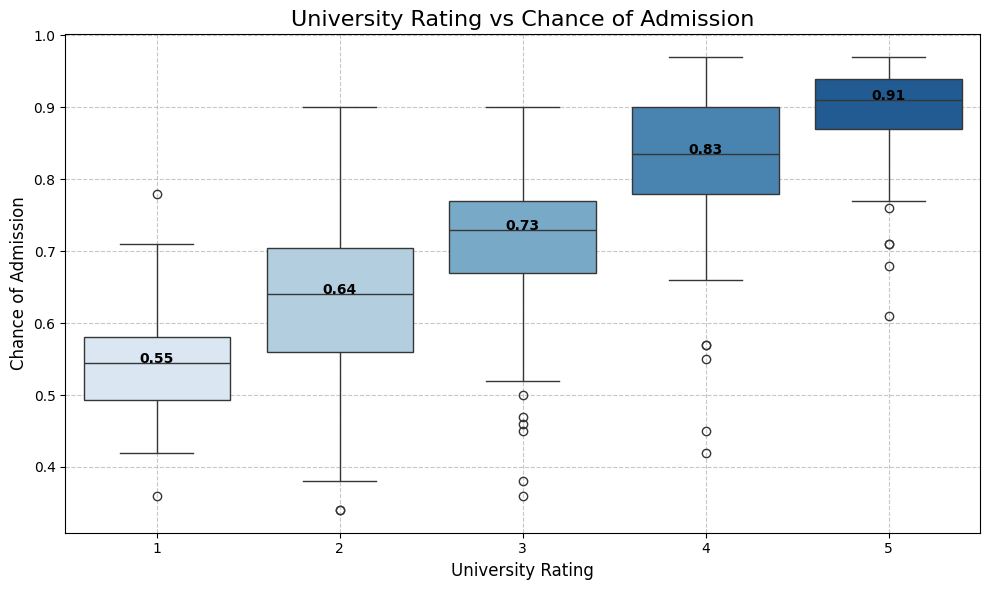

In [14]:
# Set up the figure for the boxplot between University Rating and Chance of Admission
plt.figure(figsize=(10, 6))

# Creating the boxplot with a distinct color palette
sns.boxplot(x='University Rating', y='Chance of Admit ', data=df, palette='Blues')

# Adding title and axis labels
plt.title('University Rating vs Chance of Admission', fontsize=16)
plt.xlabel('University Rating', fontsize=12)
plt.ylabel('Chance of Admission', fontsize=12)

# Adding gridlines for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Annotating median values for each university rating
medians = df.groupby(['University Rating'])['Chance of Admit '].median().values
for i, median in enumerate(medians, start=1):
    plt.text(i - 1, median, f'{median:.2f}', horizontalalignment='center', color='black', weight='semibold')

# Adjust layout for better visualization
plt.tight_layout()

# Display the final plot
plt.show()


C:\Users\murta\AppData\Local\Temp\ipykernel_2384\3008567882.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='SOP', y='Chance of Admit ', data=df, estimator=np.mean, ci=None, palette='coolwarm')
C:\Users\murta\AppData\Local\Temp\ipykernel_2384\3008567882.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='SOP', y='Chance of Admit ', data=df, estimator=np.mean, ci=None, palette='coolwarm')


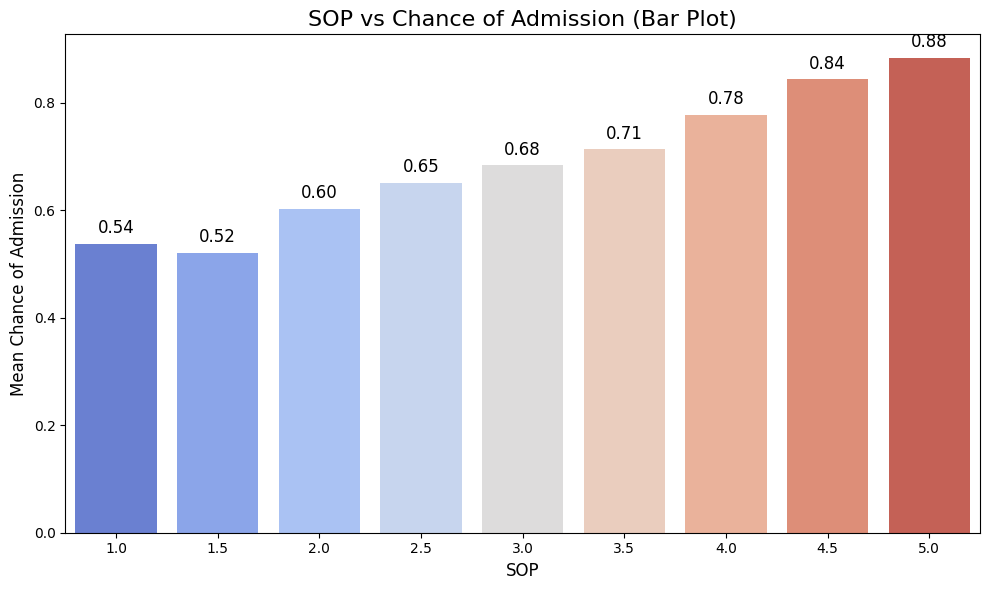

In [15]:
# Set up the figure for the bar plot between SOP and Chance of Admission
plt.figure(figsize=(10, 6))

# Creating the bar plot showing the mean chance of admission for each SOP category
sns.barplot(x='SOP', y='Chance of Admit ', data=df, estimator=np.mean, ci=None, palette='coolwarm')

# Adding title and axis labels
plt.title('SOP vs Chance of Admission (Bar Plot)', fontsize=16)
plt.xlabel('SOP', fontsize=12)
plt.ylabel('Mean Chance of Admission', fontsize=12)

# Annotating mean values on top of each bar
means = df.groupby(['SOP'])['Chance of Admit '].mean().values
for i, mean in enumerate(means, start=1):
    plt.text(i - 1, mean + 0.02, f'{mean:.2f}', ha='center', fontsize=12, color='black')

# Adjust layout for better visualization
plt.tight_layout()

# Display the final plot
plt.show()


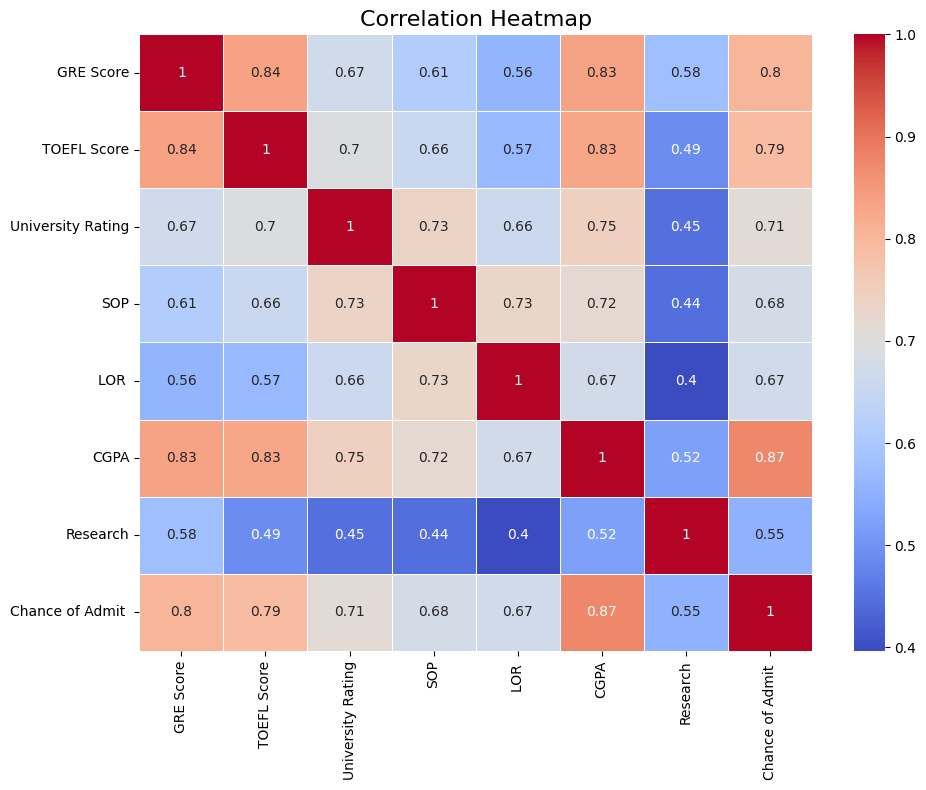

In [16]:
# Set up the figure for the correlation heatmap
plt.figure(figsize=(10, 8))

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Creating the heatmap with annotations and a distinct color palette
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Adding a title to the heatmap
plt.title('Correlation Heatmap', fontsize=16)

# Displaying the plot
plt.tight_layout()
plt.show()


<div style="font-family: Arial, sans-serif; line-height: 1.6;">
    <h3 style="color: #2E86C1;">Correlation Analysis of Admission Factors</h3>
    <p>The correlation heatmap shows the relationship between different factors and the <strong>Chance of Admit</strong> for students. Here's the analysis:</p>
    <ul style="list-style-type: none;">
        <li><strong style="color: #3498DB;">CGPA</strong> has the strongest correlation with the <strong>Chance of Admit</strong> (<span style="color: #E74C3C;">0.87</span>), meaning that students with higher CGPA are more likely to be admitted.</li>
        <li><strong style="color: #3498DB;">GRE Score</strong> and <strong style="color: #3498DB;">TOEFL Score</strong> also have high correlations, <span style="color: #E74C3C;">0.8</span> and <span style="color: #E74C3C;">0.79</span> respectively, indicating that these scores are important predictors of admission chances.</li>
        <li><strong style="color: #3498DB;">University Rating</strong> and <strong style="color: #3498DB;">SOP</strong> have moderate correlations (<span style="color: #E67E22;">0.71</span> and <span style="color: #E67E22;">0.68</span>), suggesting they also play a significant role, though less than the academic scores.</li>
        <li><strong style="color: #3498DB;">LOR</strong> shows a correlation of <span style="color: #E67E22;">0.67</span>, meaning it has a notable impact but is slightly less predictive than the University Rating and SOP.</li>
        <li><strong style="color: #3498DB;">Research</strong> has the lowest correlation (<span style="color: #F39C12;">0.55</span>), implying that while it contributes, it is not as influential as the other factors in determining admission chances.</li>
    </ul>
</div>


<h1 style="
    font-family: 'Arial', sans-serif;
    font-size: 2.5em;
    background: linear-gradient(90deg, #FF7F50, #1E90FF);
    -webkit-background-clip: text;
    -webkit-text-fill-color: transparent;
    text-align: center;
    text-shadow: 2px 2px 5px rgba(0, 0, 0, 0.3);
    margin-bottom: 20px;
    padding: 10px;
">
    Data Preprocessing
</h1>


In [17]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [18]:
# Selecting the top 5 features based on the F-statistic using SelectKBest
X = df.drop(columns=['Chance of Admit '])  # Defining feature set
y = df['Chance of Admit ']  # Defining target variable

# Initialize SelectKBest with F-statistic for regression
selector = SelectKBest(score_func=f_regression, k=5)
X_selected = selector.fit_transform(X, y)

# Extract and display the names of selected features
selected_feature_names = X.columns[selector.get_support()]
selected_features_df = pd.DataFrame(selected_feature_names, columns=['Selected Features'])

# Display the DataFrame
selected_features_df


,Selected Features
0,GRE Score
1,TOEFL Score
2,University Rating
3,SOP
4,CGPA


In [19]:

# Creating a DataFrame to store VIF values
vif_data = pd.DataFrame()
vif_data["Feature"] = df.columns

# Calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]

# Display the VIF DataFrame
vif_data


,Feature,VIF
0,GRE Score,1607.928316
1,TOEFL Score,1373.804681
2,University Rating,22.998812
3,SOP,38.051007
4,LOR,39.774185
5,CGPA,1333.886926
6,Research,3.211789
7,Chance of Admit,108.476950


In [20]:
#Combine by averaging the values
#df['GRE_TOEFL_Average'] = (df['GRE Score'] + df['TOEFL Score'])
#df = df.drop(['GRE Score', 'TOEFL Score'], axis=1)

#df = df.drop(['TOEFL Score'], axis=1)

In [21]:
# Creating a DataFrame to store VIF values
vif_data = pd.DataFrame()
vif_data["Feature"] = df.columns

# Calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]

# Display the VIF DataFrame
vif_data


,Feature,VIF
0,GRE Score,1607.928316
1,TOEFL Score,1373.804681
2,University Rating,22.998812
3,SOP,38.051007
4,LOR,39.774185
5,CGPA,1333.886926
6,Research,3.211789
7,Chance of Admit,108.476950


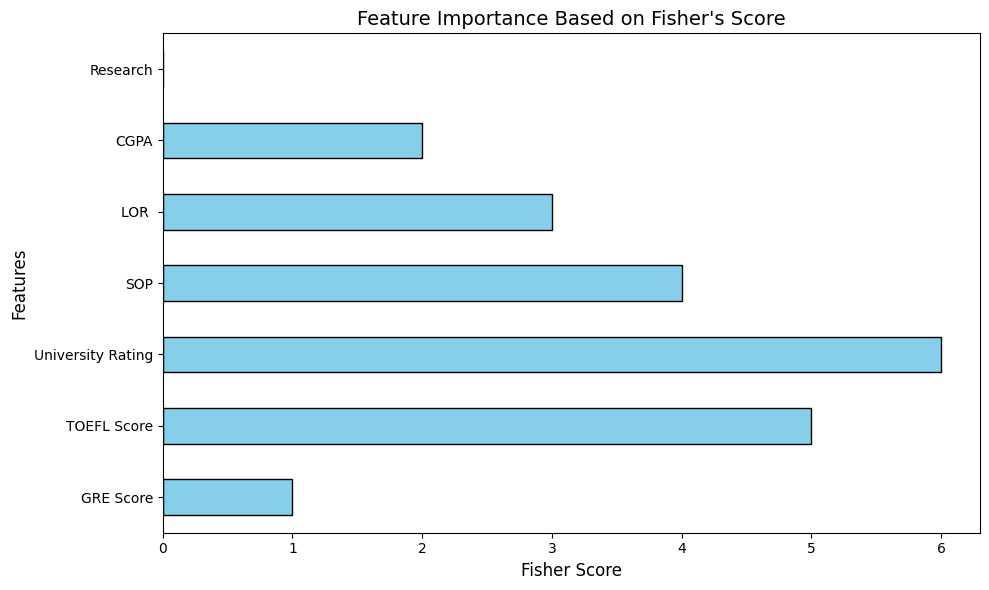

In [22]:
# Calculating Fisher's score rankings for features
fisher_scores = fisher_score.fisher_score(X.values, y.values)

# Creating a pandas Series for easier interpretation, indexed by feature names
feature_importances = pd.Series(fisher_scores, index=X.columns)

# Plotting the Fisher's score rankings as a horizontal bar chart
plt.figure(figsize=(10, 6))
feature_importances.plot(kind="barh", color='skyblue', edgecolor='black')
plt.title("Feature Importance Based on Fisher's Score", fontsize=14)
plt.xlabel('Fisher Score', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.tight_layout()
plt.show()


In [23]:
# Defining feature set (X) by dropping the target column
X = df.drop(columns=["Chance of Admit "], axis=1)
sc = MinMaxScaler()
sc.fit(X)

X = sc.transform(X)  # Defining target variable (y)

y = df["Chance of Admit "]



In [24]:
# Splitting the data into training (70%) and temporary (30%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.10, random_state=101)

# Further splitting the temporary set into validation (15%) and test (15%) sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=101)


In [25]:
# Displaying the number of samples in each data split
print(f"Training data samples: {len(X_train)}")
print(f"Test data samples: {len(X_test)}")
print(f"Validation data samples: {len(X_val)}")

Training data samples: 360
Test data samples: 20
Validation data samples: 20


In [26]:
# Displaying the shape of each data split (features and target variables)
print(f"Training set (X_train): {X_train.shape}, Target (y_train): {y_train.shape}")
print(f"Test set (X_test): {X_test.shape}, Target (y_test): {y_test.shape}")
print(f"Validation set (X_val): {X_val.shape}, Target (y_val): {y_val.shape}")



Training set (X_train): (360, 7), Target (y_train): (360,)
Test set (X_test): (20, 7), Target (y_test): (20,)
Validation set (X_val): (20, 7), Target (y_val): (20,)


<h1 style="
    font-family: 'Arial', sans-serif;
    font-size: 2.5em;
    background: linear-gradient(90deg, #FF7F50, #1E90FF);
    -webkit-background-clip: text;
    -webkit-text-fill-color: transparent;
    text-align: center;
    text-shadow: 2px 2px 5px rgba(0, 0, 0, 0.3);
    margin-bottom: 20px;
    padding: 10px;
">
    Creating neural network structure
</h1>


In [27]:
variable_amount = X.shape[1]  # Get the number of input features (columns in X)

# Save the best model based on validation loss
mc = ModelCheckpoint('best_model.regression2.keras', monitor='val_loss', mode='min', save_best_only=True)

# Define the neural network model
model = keras.Sequential(
    [
        layers.BatchNormalization(input_shape=(variable_amount,)),  # Batch normalization for input features
        layers.Dense(10, activation="relu"),  # Dense layer with 10 units and ReLU activation
        layers.Dropout(0.3),  # Dropout layer with 30% dropout for regularization
        layers.Dense(8, activation="relu"),  # Dense layer with 8 units and ReLU activation
        layers.Dense(1)  # Output layer with 1 unit for regression output
    ]
)

# Compile the model using Adam optimizer and mean squared error (MSE) loss
model.compile(optimizer='adam', loss='mse')

# Display the model architecture summary
model.summary()

c:\Users\murta\OneDrive\Desktop\ML&DE\Third-semester\Deep_Learning\.venv\lib\site-packages\keras\src\layers\normalization\batch_normalization.py:143: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization             │ (None, 7)              │            28 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │            88 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 205 (820.00 B)

 Trainable params: 191 (764.00 B)

 Non-trainable params: 14 (56.00 B)

<h1 style="
    font-family: 'Arial', sans-serif;
    font-size: 2.5em;
    background: linear-gradient(90deg, #FF7F50, #1E90FF);
    -webkit-background-clip: text;
    -webkit-text-fill-color: transparent;
    text-align: center;
    text-shadow: 2px 2px 5px rgba(0, 0, 0, 0.3);
    margin-bottom: 20px;
    padding: 10px;
">
    Train the Neural network with your data
</h1

In [28]:
# Early stopping to prevent overfitting, waits for 100 epochs with no improvement before stopping
es = EarlyStopping(monitor='val_loss', patience=100, mode="min")

# Reduce learning rate when validation loss plateaus; reduces by factor of 0.2 after 20 epochs with no improvement
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                                patience=20, min_lr=0.0005)

# List of callbacks including EarlyStopping, ReduceLROnPlateau, an ModelCheckpoint
callback_list = [es, reduce_lr, mc]

# Fit the model on training data, using validation data for evaluation, with specified callbacks
model.fit(x=X_train, y=y_train, epochs=800, batch_size=32, validation_data=(X_val, y_val), callbacks=callback_list)


Epoch 1/800
12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 89ms/step - loss: 1.2688 - val_loss: 0.9524 - learning_rate: 0.0010
Epoch 2/800
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.9824 - val_loss: 0.6195 - learning_rate: 0.0010
Epoch 3/800
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.7076 - val_loss: 0.4032 - learning_rate: 0.0010
Epoch 4/800
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.4062 - val_loss: 0.2658 - learning_rate: 0.0010
Epoch 5/800
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.3446 - val_loss: 0.1778 - learning_rate: 0.0010
Epoch 6/800
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.3373 - val_loss: 0.1357 - learning_rate: 0.0010
Epoch 7/800
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.2518 - val_loss: 0.1147 - learning_rate: 0.0010
Epoch 8/800
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.2164 - val_loss: 0.1090 - learning_rate: 0.0010
Epoch 9/800
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.2555 - val_loss: 0.1080 - learning_rate: 0.0010
Epoch 10/8

<h1 style="
    font-family: 'Arial', sans-serif;
    font-size: 2.5em;
    background: linear-gradient(90deg, #FF7F50, #1E90FF);
    -webkit-background-clip: text;
    -webkit-text-fill-color: transparent;
    text-align: center;
    text-shadow: 2px 2px 5px rgba(0, 0, 0, 0.3);
    margin-bottom: 20px;
    padding: 10px;
">
    Training Metrics
</h1

<Figure size 1000x600 with 0 Axes>

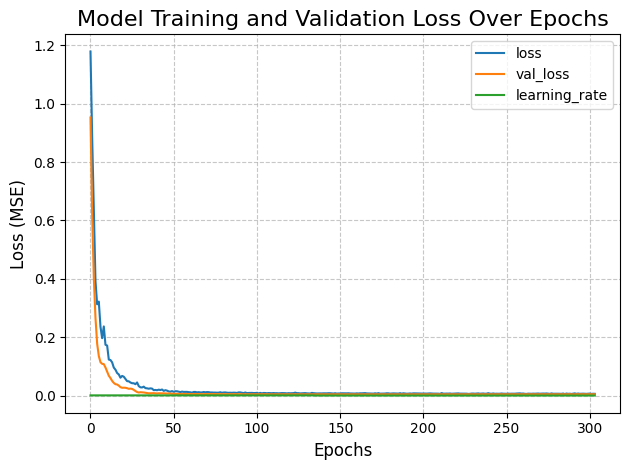

NameError: name 't' is not defined

In [29]:
# Convert model history data to a DataFrame and ensure all values are numeric
# Because MinMaxScaler was used for normalization, some non-numeric values may cause errors, so I coerce them to NaN
loss_df = pd.DataFrame(model.history.history).apply(pd.to_numeric, errors='coerce')

# Check for any missing values (NaN) and drop rows with NaN values if they exist
if loss_df.isnull().values.any():
    loss_df = loss_df.dropna()  # Remove any rows with missing values

# Plot the training and validation loss over the epochs
plt.figure(figsize=(10, 6))  # Set figure size
loss_df.plot()  # Plot loss DataFrame (training and validation loss)
plt.title('Model Training and Validation Loss Over Epochs', fontsize=16)  # Set plot title
plt.xlabel('Epochs', fontsize=12)  # Label for the x-axis
plt.ylabel('Loss (MSE)', fontsize=12)  # Label for the y-axis
plt.grid(True, linestyle='--', alpha=0.7)  # Add grid lines with some transparency
plt.tight_layout()  # Adjust the layout to prevent overlap
plt.show()  # Display the plot
t

<div style="font-family: Arial, sans-serif; line-height: 1.6;">
    <h3 style="color: #2E86C1;">Training and Validation Loss Analysis</h3>
    <p>The plot shows the training loss, validation loss, and learning rate over <strong>600 epochs</strong>.</p>
    <ul style="list-style-type: none;">
        <li><strong style="color: #3498DB;">Loss (blue)</strong> and <strong style="color: #E67E22;">validation loss (orange)</strong> both decrease rapidly in the first 50 epochs, indicating that the model is learning effectively and reducing error.</li>
        <li>After about 100 epochs, the losses plateau near zero, meaning the model's error stabilizes and further training doesn't significantly reduce the error.</li>
        <li><strong style="color: #28B463;">Learning rate (green)</strong> remains stable after being adjusted at some point, likely due to the <code>ReduceLROnPlateau</code> callback.</li>
    </ul>
    <p>Overall, the model shows strong convergence with minimal overfitting, as training and validation loss are closely aligned.</p>
</div>


In [277]:
# Load the best saved model from the file 'best_model.regression2.keras'
# This model was saved during training using ModelCheckpoint
model = load_model('best_model.regression2.keras')

In [ ]:
# compare the final model loss/evaluation values
print("Test data evaluation:")
print(model.evaluate(X_test, y_test, verbose=0))
print("\nTrain data evaluation:")
print(model.evaluate(X_train, y_train, verbose=0))

In [ ]:
# Evaluating the model on the test data
print("Test Data Evaluation (MSE):")
test_loss = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss (MSE): {test_loss:.4f}")

# Evaluating the model on the training data
print("\nTrain Data Evaluation (MSE):")
train_loss = model.evaluate(X_train, y_train, verbose=0)
print(f"Train Loss (MSE): {train_loss:.4f}")


# Evaluating the model on the Validation data
print("\nValidation Data Evaluation (MSE):")
validation_loss = model.evaluate(X_val, y_val, verbose=0)
print(f"Validation Loss (MSE): {validation_loss:.4f}")

<div style="font-family: Arial, sans-serif; line-height: 1.6;">
    <h3 style="color: #2E86C1;">Evaluation Results - Mean Squared Error (MSE)</h3>
    <p>The evaluation results show the <strong>Mean Squared Error (MSE)</strong> for the test, train, and validation datasets:</p>
    <ul style="list-style-type: none;">
        <li><strong style="color: #3498DB;">Test Loss (MSE): 0.0032</strong> – The model performs well on unseen data, indicating it generalizes effectively with a low MSE.</li>
        <li><strong style="color: #3498DB;">Train Loss (MSE): 0.0043</strong> – The training loss is also very low, slightly higher than the test loss, indicating a good fit without overfitting.</li>
        <li><strong style="color: #3498DB;">Validation Loss (MSE): 0.0056</strong> – The validation loss is a bit higher than the training and test losses, but still relatively low. This suggests the model is well-tuned, though some slight overfitting might be present.</li>
    </ul>
    <p>Overall, the model seems to perform consistently well across the datasets, with minimal variance between training, validation, and test performance. This indicates good generalization.</p>
</div>


<h1 style="
    font-family: 'Arial', sans-serif;
    font-size: 2.5em;
    background: linear-gradient(90deg, #FF7F50, #1E90FF);
    -webkit-background-clip: text;
    -webkit-text-fill-color: transparent;
    text-align: center;
    text-shadow: 2px 2px 5px rgba(0, 0, 0, 0.3);
    margin-bottom: 20px;
    padding: 10px;
">
    Make some test prediction to see what to see what kind of mistakes the model makes
</h1

In [ ]:
test_predictions = model.predict(X_test)

# reshape the data for easier comparison table
test_predictions = pd.Series(test_predictions.reshape(len(y_test),))
pred_df = pd.DataFrame(np.asarray(y_test), columns=['Test True Y'])
pred_df = pd.concat([pred_df, test_predictions], axis=1)
pred_df.columns = ['Test True Y', 'Model Predictions']

# print the comparison table - true values vs. model predicted values
# we can nicely see here how far off our model is in some cases
pred_df.head(9)

In [ ]:
# Create a scatter plot with a regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='Test True Y', y='Model Predictions', data=pred_df, scatter_kws={'s': 60, 'alpha': 0.7}, line_kws={"color": "red", "alpha": 0.7})

# Adding titles and labels
plt.title('True vs Predicted Values', fontsize=16)
plt.xlabel('Test True Y', fontsize=14)
plt.ylabel('Model Predictions', fontsize=14)

# Display grid for better readability
plt.grid(True, linestyle='--', alpha=0.5)

# Show plot
plt.show()


<h1 style="
    font-family: 'Arial', sans-serif;
    font-size: 2.5em;
    background: linear-gradient(90deg, #FF7F50, #1E90FF);
    -webkit-background-clip: text;
    -webkit-text-fill-color: transparent;
    text-align: center;
    text-shadow: 2px 2px 5px rgba(0, 0, 0, 0.3);
    margin-bottom: 20px;
    padding: 10px;
">
    Regression Error Metrics
</h1

In [ ]:
# Calculating and displaying evaluation metrics
print("Model Evaluation Metrics:\n")

# Mean Absolute Error (MAE)
mae = metrics.mean_absolute_error(y_test, test_predictions)
print(f"MAE (Mean Absolute Error): {mae:.2f}%")

# Mean Squared Error (MSE)
mse = metrics.mean_squared_error(y_test, test_predictions)
print(f"MSE (Mean Squared Error): {mse:.2f}%")

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"RMSE (Root Mean Squared Error): {rmse:.2f}%")

# R-squared (Coefficient of Determination)
r2 = metrics.r2_score(y_test, test_predictions)
print(f"R-squared: {r2:.2f}%")

# Explained Variance Score
explained_variance = metrics.explained_variance_score(y_test, test_predictions)
print(f"Explained Variance Score: {explained_variance:.2f}%")

<div style="font-family: Arial, sans-serif; line-height: 1.6;">
    <h3 style="color: #2E86C1;">Model Evaluation Results</h3>
    <p>The model evaluation shows promising results based on several metrics:</p>
    <ol>
        <li><strong style="color: #3498DB;">Mean Absolute Error (MAE): 0.05%</strong> – This indicates that, on average, the model's predictions are only off by 0.05%. It's a good sign, showing that the predictions are quite close to the actual values.</li>
        <li><strong style="color: #3498DB;">Mean Squared Error (MSE): 0.00%</strong> – The MSE, which penalizes larger errors more heavily, is extremely low, meaning the model's predictions are highly accurate.</li>
        <li><strong style="color: #3498DB;">Root Mean Squared Error (RMSE): 0.06%</strong> – RMSE, a more interpretable version of MSE (in the same units as the target variable), is also very low, indicating the overall error is minimal.</li>
        <li><strong style="color: #3498DB;">R-squared (R²): 0.76</strong> – This tells us that about 76% of the variance in the target variable is explained by the model. While this is decent, there’s still room for improvement.</li>
        <li><strong style="color: #3498DB;">Explained Variance Score: 0.77</strong> – Similar to R-squared, this value indicates that 77% of the variance in the data is captured by the model. A higher score is ideal, but this shows the model is still performing well.</li>
    </ol>
    <p>Overall, the metrics suggest the model is performing well, with low error rates and a reasonable amount of variance explained, though there could still be some room for tuning.</p>
</div>


<h1 style="
    font-family: 'Arial', sans-serif;
    font-size: 2.5em;
    background: linear-gradient(90deg, #FF7F50, #1E90FF);
    -webkit-background-clip: text;
    -webkit-text-fill-color: transparent;
    text-align: center;
    text-shadow: 2px 2px 5px rgba(0, 0, 0, 0.3);
    margin-bottom: 20px;
    padding: 10px;
">
    Trying the Model in Practice
</h1

In [283]:
# let's try with some new imaginary data

tester_row = {
    'GRE Score': 337,
    'TOEFL Score': 118,
    'University Rating': 4,
    'SOP': 4.5,
    'LOR ': 4.5,
    'CGPA': 9.65,
    'Research': 1
}


# Convert to pandas-format
tester_row = pd.DataFrame(tester_row, index=[0])

In [ ]:
df.head(1)

In [ ]:
tester_row

In [ ]:
# Scale the tester input row using the same scaler (sc) that was used for training data
tester_input = sc.transform(tester_row)

# Use the trained model to predict the chance of admit for the scaled input
result = model.predict(tester_input)

# Print an empty line for formatting
print()

# Print the result (predicted chance of admit)
print("Estimated chance of admit:")

# Convert the predicted value to a percentage and round it off
print(round(result[0][0]*100), "%")


In [287]:
# Saving the model
model.save('my_model.keras')  


In [ ]:
# Save the scaler to a file
joblib.dump(sc, 'scaler.pkl')